In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from anchor import utils

dataset_folder = 'data/'
dataset = utils.load_dataset('adult', balance=True, dataset_folder=dataset_folder)

c = RandomForestClassifier(n_estimators=50, n_jobs=5)
c.fit(dataset.train, dataset.labels_train)

import xdeep.local.perturbation.xdeep_tabular as xdeep_tabular
%load_ext autoreload
%autoreload 2

explainer = xdeep_tabular.TabularExplainer(c.predict_proba, ['<=50K', '>50K'], dataset.feature_names, dataset.train[0:50],
                                           categorical_features=dataset.categorical_features, categorical_names=dataset.categorical_names)

Initialize default 'lime', 'cle', 'shap' explainers. Please explicitly initialize 'anchor' explainer before use it.



LIME Explanation
Instance: [ 1.  4.  9.  2. 12.  0.  4.  1.  0.  0.  2. 39.]

Explanation for label >50K:
Local Prediction:     0.787
Original Prediction:  0.857

  Capital Gain=0       : -0.262  |  Capital Loss=0       : -0.214  |  Marital Status=Married-civ-spouse : 0.191  |
  Hours per week=Hours per week > 45.00 : 0.123  |  Education=Bachelors  : 0.117  |  Relationship=Husband : 0.101  |
  Occupation=Sales     : 0.039  |  Sex=Male             : 0.037  |  Race=White           : 0.033  |
  Age=28.00 < Age <= 37.00 : 0.024  |


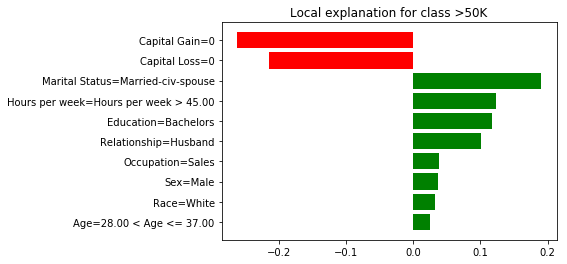

In [2]:
explainer.set_parameters('lime', discretize_continuous=True)
explainer.explain('lime', dataset.test[0])
explainer.show_explanation('lime')


CLE Explanation
Instance: [ 1.  4.  9.  2. 12.  0.  4.  1.  0.  0.  2. 39.]

Explanation for label >50K:
Local Prediction:     0.766
Original Prediction:  0.857

  Capital Gain=0 AND Capital Loss=0 : -0.251  |  Marital Status=Married-civ-spouse AND Capital Gain=0 : 0.187  |  Country=United-States          : 0.151  |
  Capital Gain=0 AND Country=United-States : -0.132  |  Hours per week=Hours per week > 45.00 : 0.120  |  Education=Bachelors AND Race=White : 0.104  |
  Race=White AND Capital Loss=0  : 0.056  |  Education=Bachelors AND Capital Gain=0 : 0.039  |  Education=Bachelors            : 0.038  |
  Race=White                     : -0.025  |



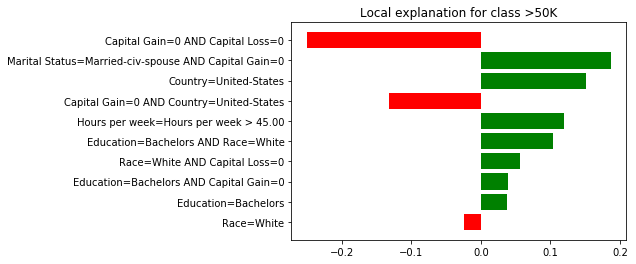

In [3]:
explainer.set_parameters('cle', discretize_continuous=True)
explainer.explain('cle', dataset.test[0])
explainer.show_explanation('cle')

In [4]:
explainer.explain('shap', dataset.test[0])
explainer.show_explanation('shap')


Shap Explanation

Shap value for label >50K:
[ 0.00291613  0.00463416  0.13189178  0.05658283  0.03577155  0.05432034
  0.02069185  0.02543749 -0.01511676 -0.00298987  0.03825256  0.00525402]


In [5]:
explainer.initialize_anchor(dataset.data)
encoder = explainer.get_anchor_encoder(dataset.train[0:50], dataset.labels_train, dataset.validation, dataset.labels_validation)
c_new = RandomForestClassifier(n_estimators=50, n_jobs=5)
c_new.fit(encoder.transform(dataset.train), dataset.labels_train)
explainer.set_anchor_predict_proba(c_new.predict_proba)
explainer.explain('anchor', dataset.test[0])
explainer.show_explanation('anchor')

If you want to use 'anchor' to explain tabular classifier. You need to get this encoder to encode your data, and train another model.


/home/zijianzhang0226/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/home/zijianzhang0226/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)



Anchor Explanation


Examples where anchor applies and model predicts same to instance:

[[ 1.  6.  9.  2. 12.  0.  4.  1.  0.  2.  1. 39.]
 [ 3.  4.  9.  2. 12.  0.  4.  1.  0.  0.  0. 39.]
 [ 3.  5.  9.  2. 12.  0.  4.  1.  0.  0.  2. 39.]
 [ 3.  4.  9.  2. 12.  0.  4.  1.  0.  0.  0. 39.]
 [ 3.  5.  9.  2. 12.  0.  4.  1.  0.  0.  2. 39.]
 [ 1.  4.  9.  2. 12.  0.  4.  1.  0.  0.  2. 39.]
 [ 3.  4.  9.  2. 12.  0.  4.  1.  0.  0.  0. 39.]
 [ 3.  5.  9.  2. 12.  0.  4.  1.  0.  0.  0. 39.]
 [ 1.  4.  9.  2. 12.  0.  4.  1.  0.  0.  0. 39.]
 [ 3.  5.  9.  2. 12.  0.  4.  1.  1.  0.  0. 39.]]

Examples where anchor applies and model predicts different with instance:

[]
Prediction: 1
Anchor: Education = Bachelors AND Relationship = Husband AND Occupation = Sales
Precision: 1.00
Coverage: 0.02
